Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

Type of Data

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [6]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [7]:
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

check Null values

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


visualisation

<Axes: >

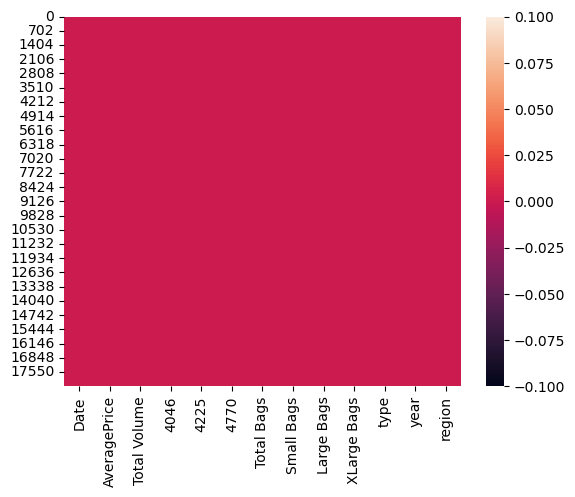

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

conversion of date format

In [13]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [14]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


In [15]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [16]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

above data no null values

Visualisation

<Figure size 800x800 with 0 Axes>

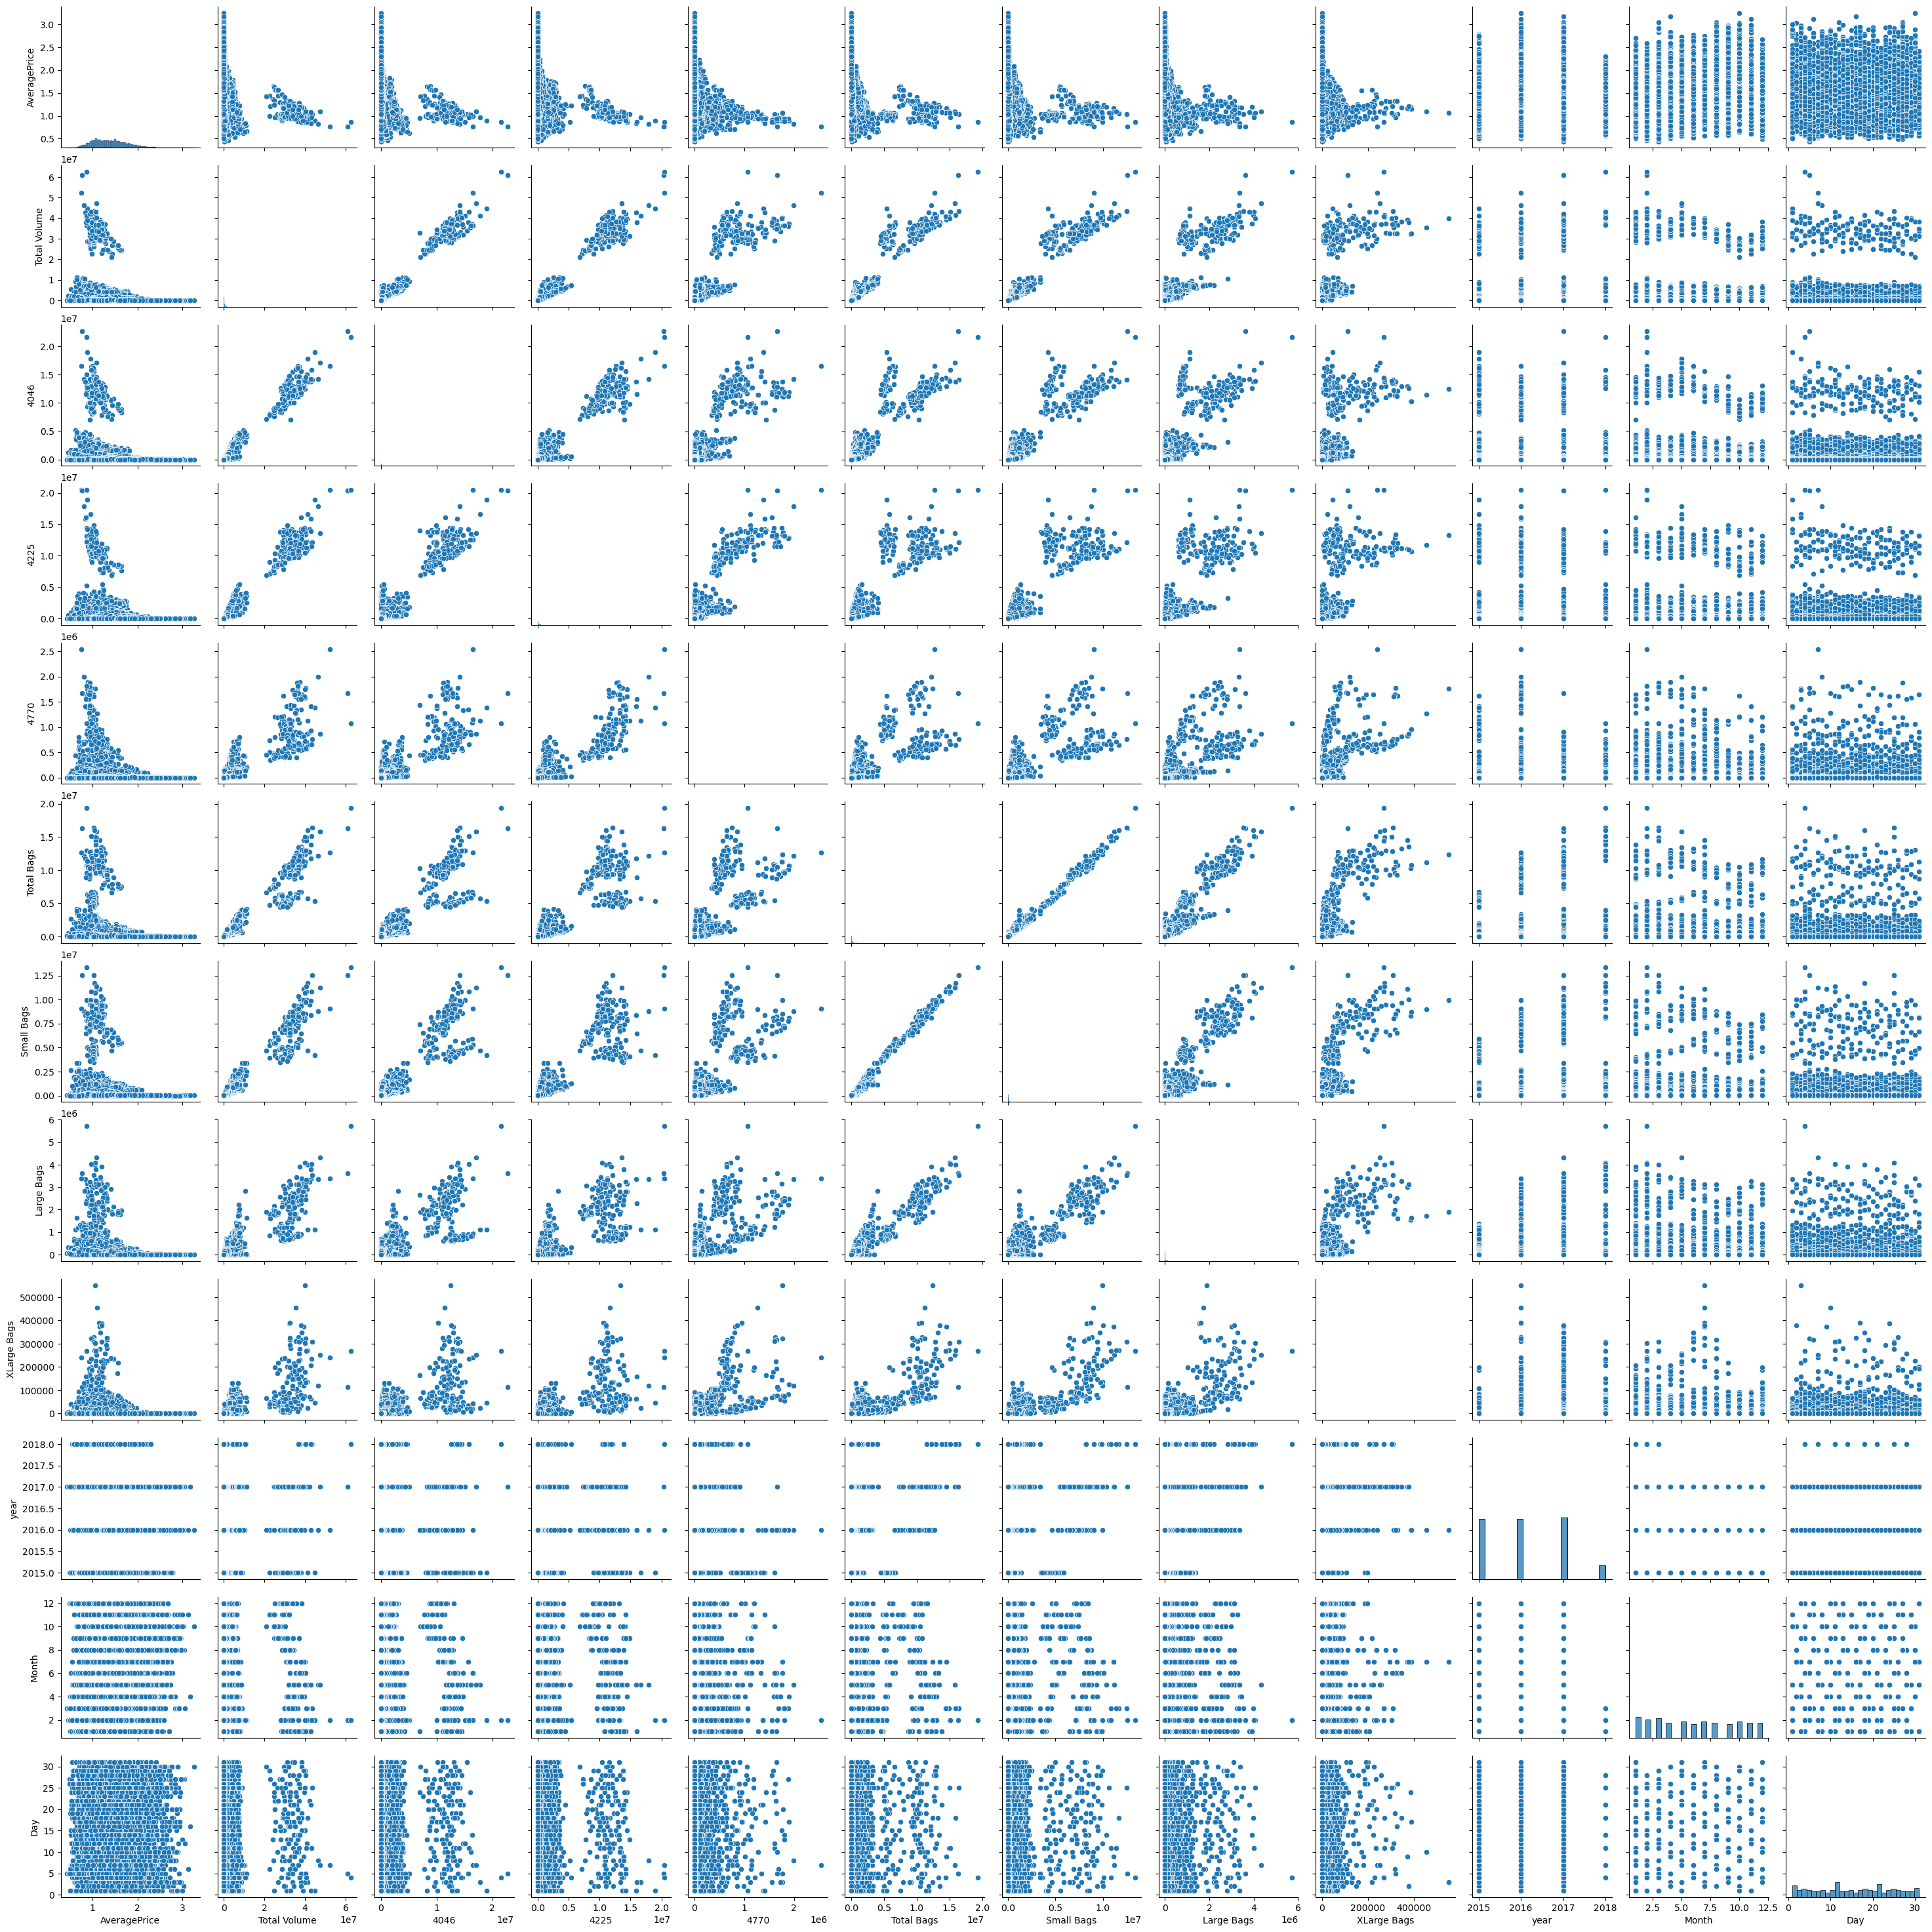

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(df)
plt.show()

above data give relation between all features

<Axes: xlabel='year', ylabel='AveragePrice'>

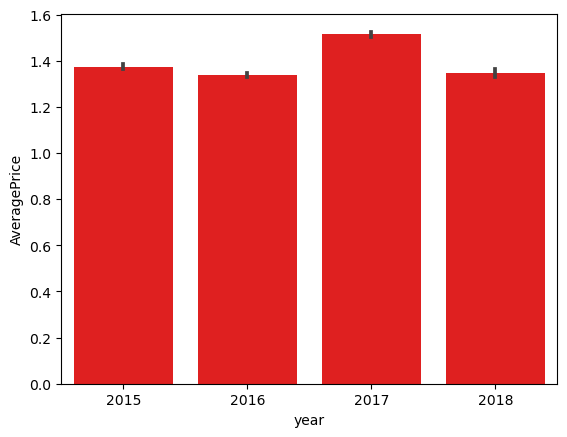

In [18]:
 sns.barplot(x="year", y="AveragePrice", data=df, color="red")

<Axes: xlabel='type', ylabel='AveragePrice'>

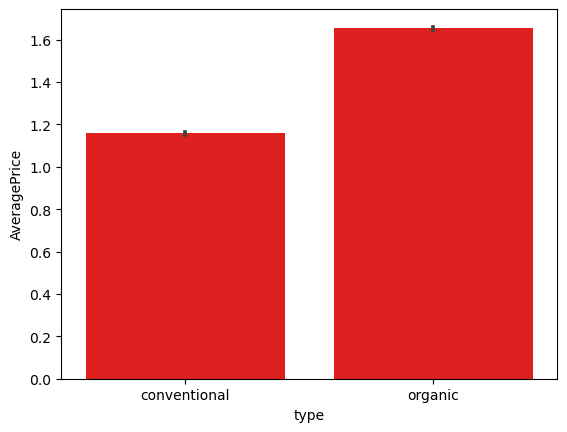

In [20]:
sns.barplot(x="type", y="AveragePrice", data=df, color="red")

above data contain 2 types

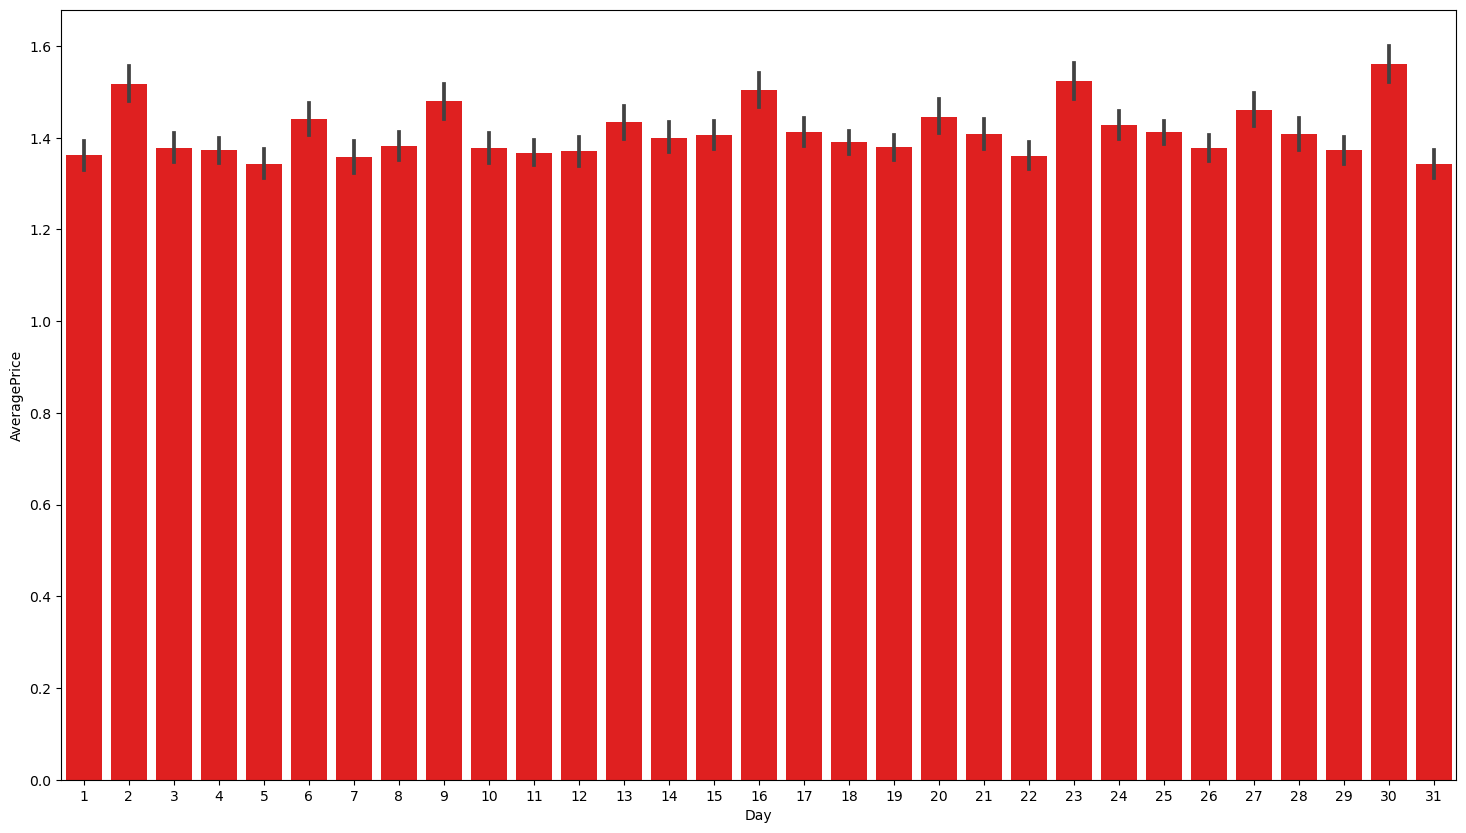

In [21]:
plt.figure(figsize=(18,10))
sns.barplot(x="Day", y="AveragePrice", data=df, color="red")
plt.show()

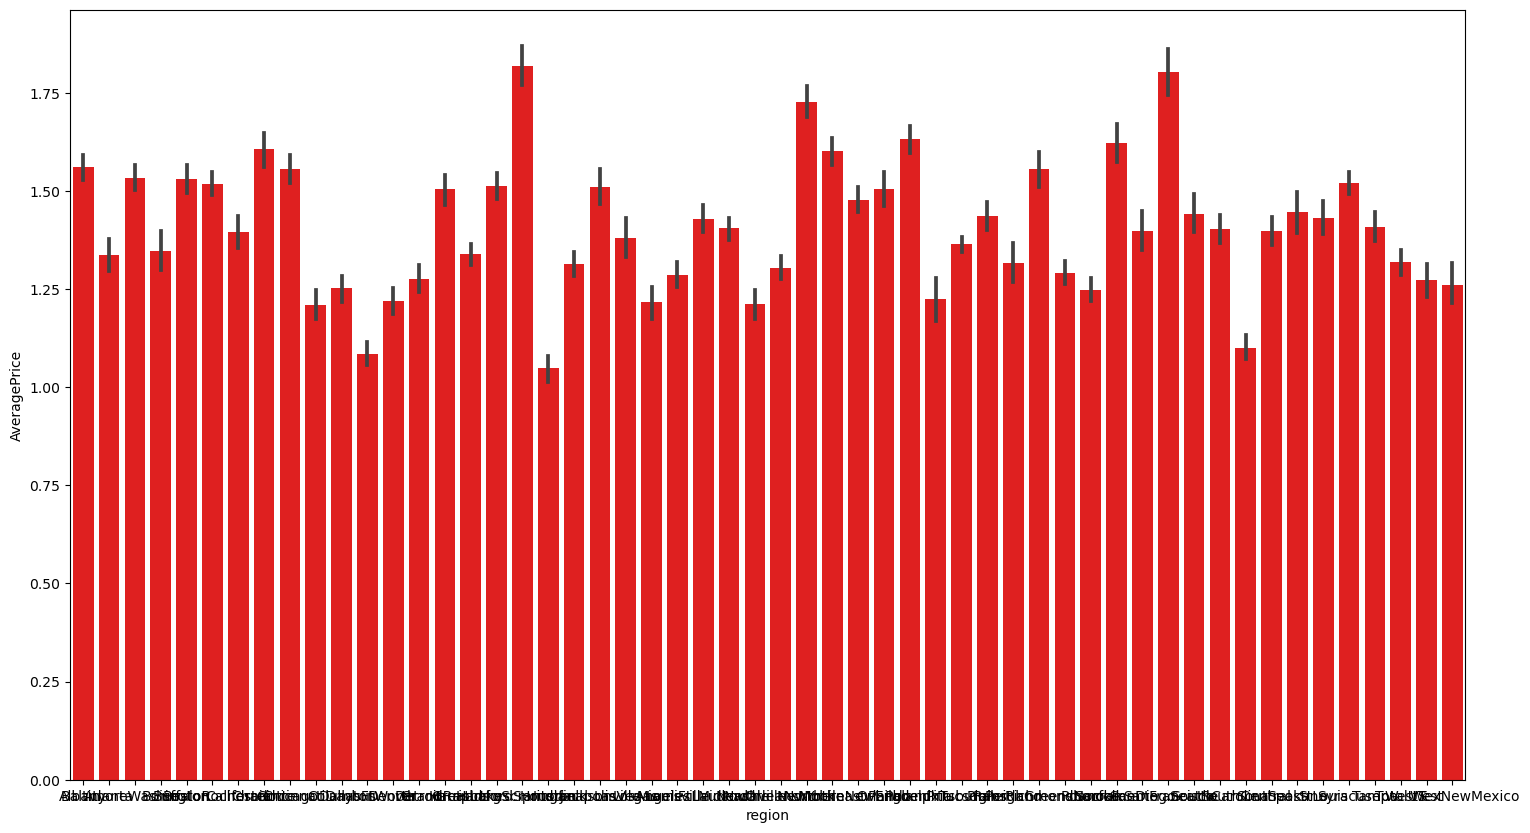

In [22]:
plt.figure(figsize=(18,10))
sns.barplot(x="region", y="AveragePrice", data=df, color="red")
plt.show()

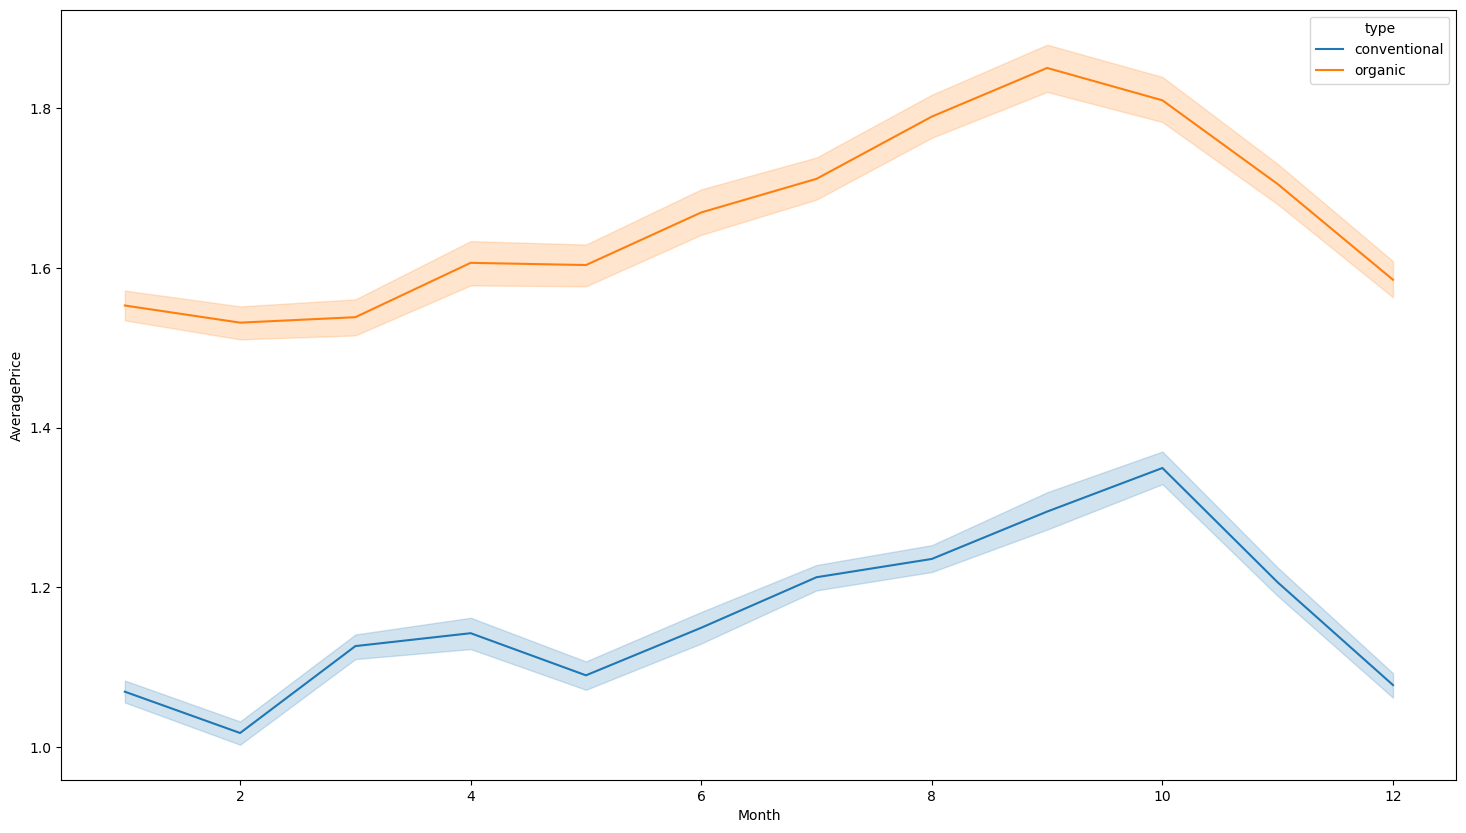

In [23]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

above data upto 10 increases and then decreases

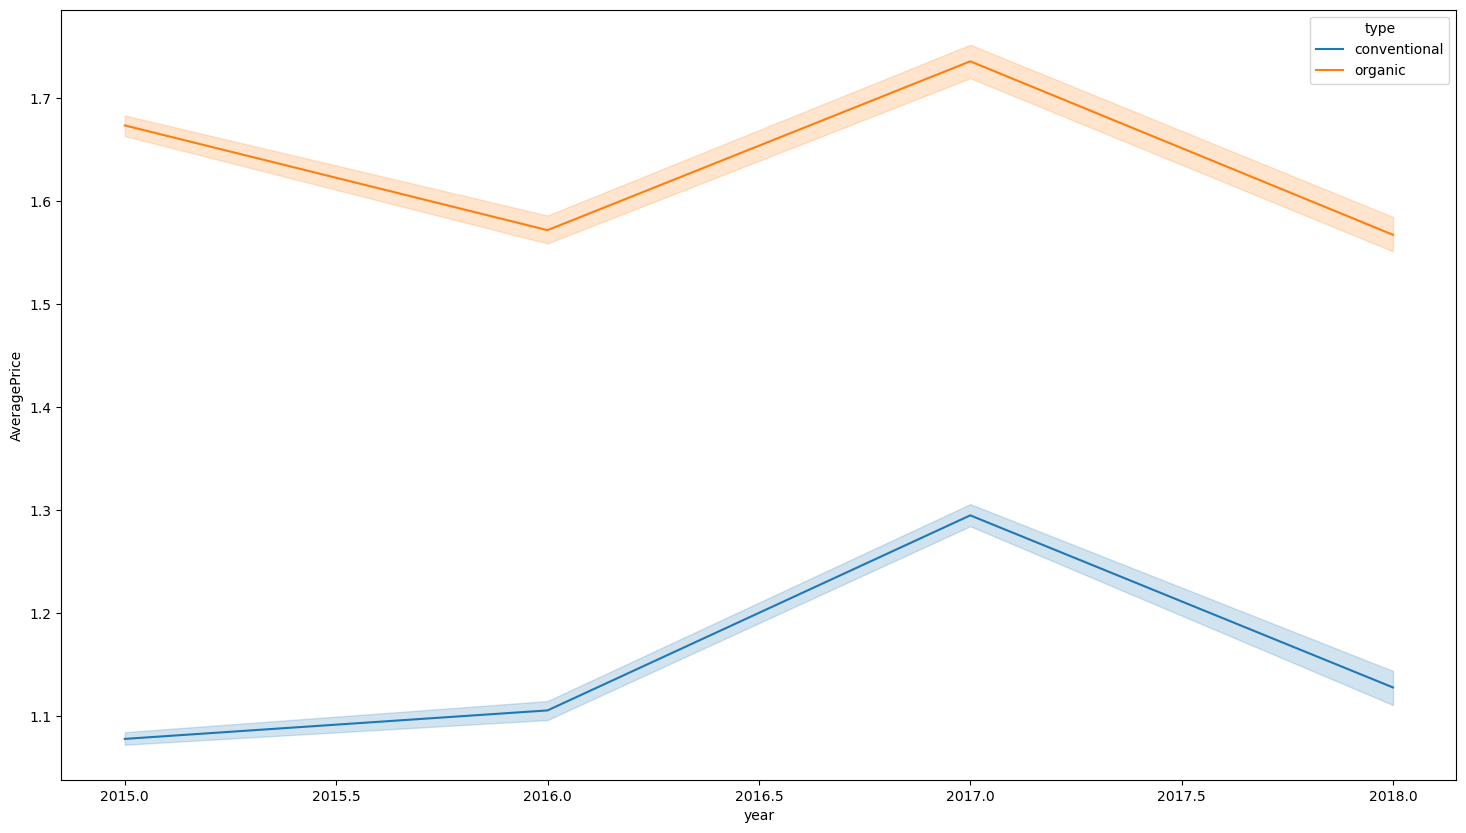

In [24]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

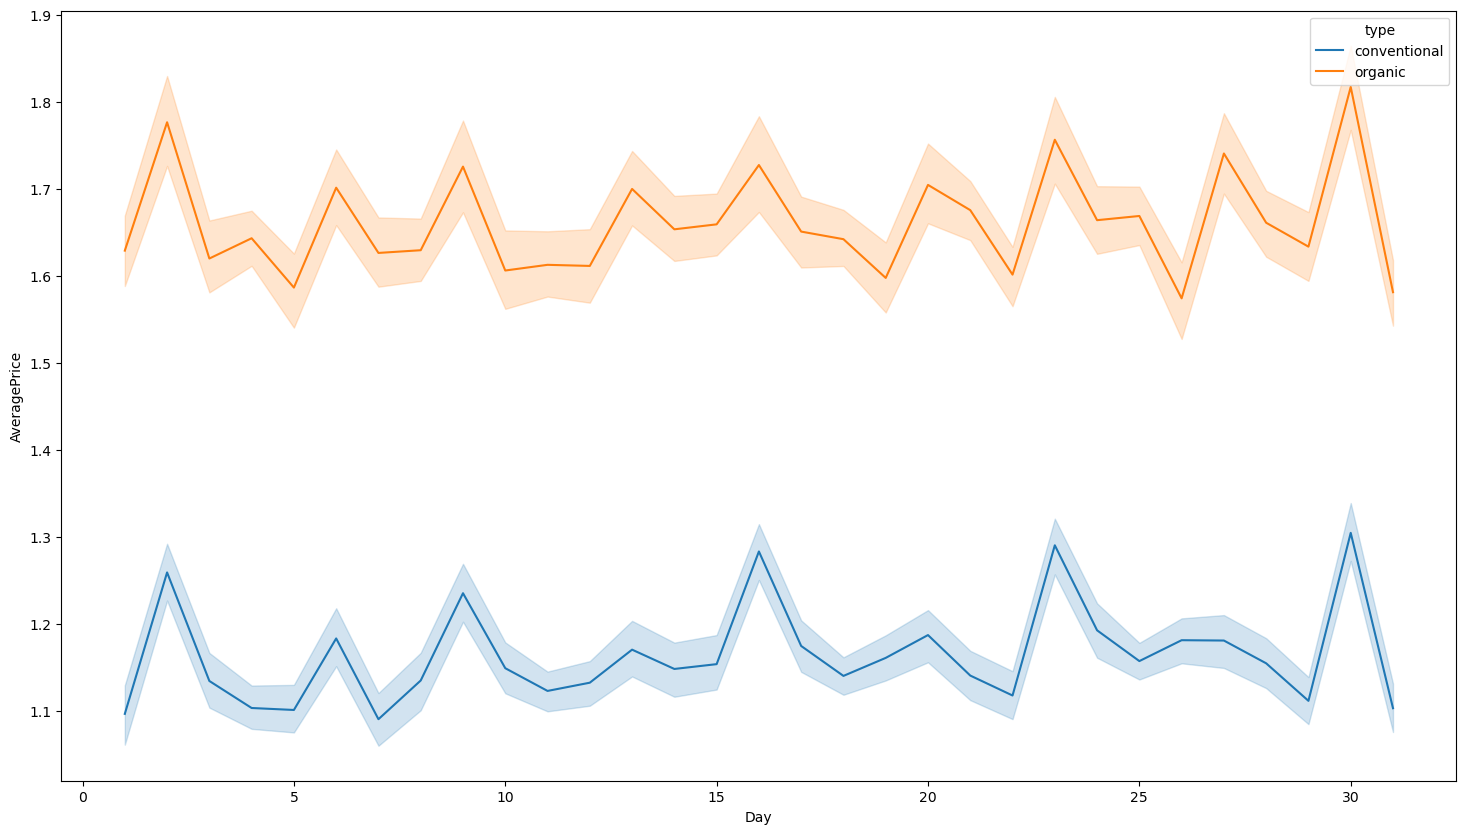

In [25]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Day", y="AveragePrice", hue='type', data=df)
plt.show()

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [27]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


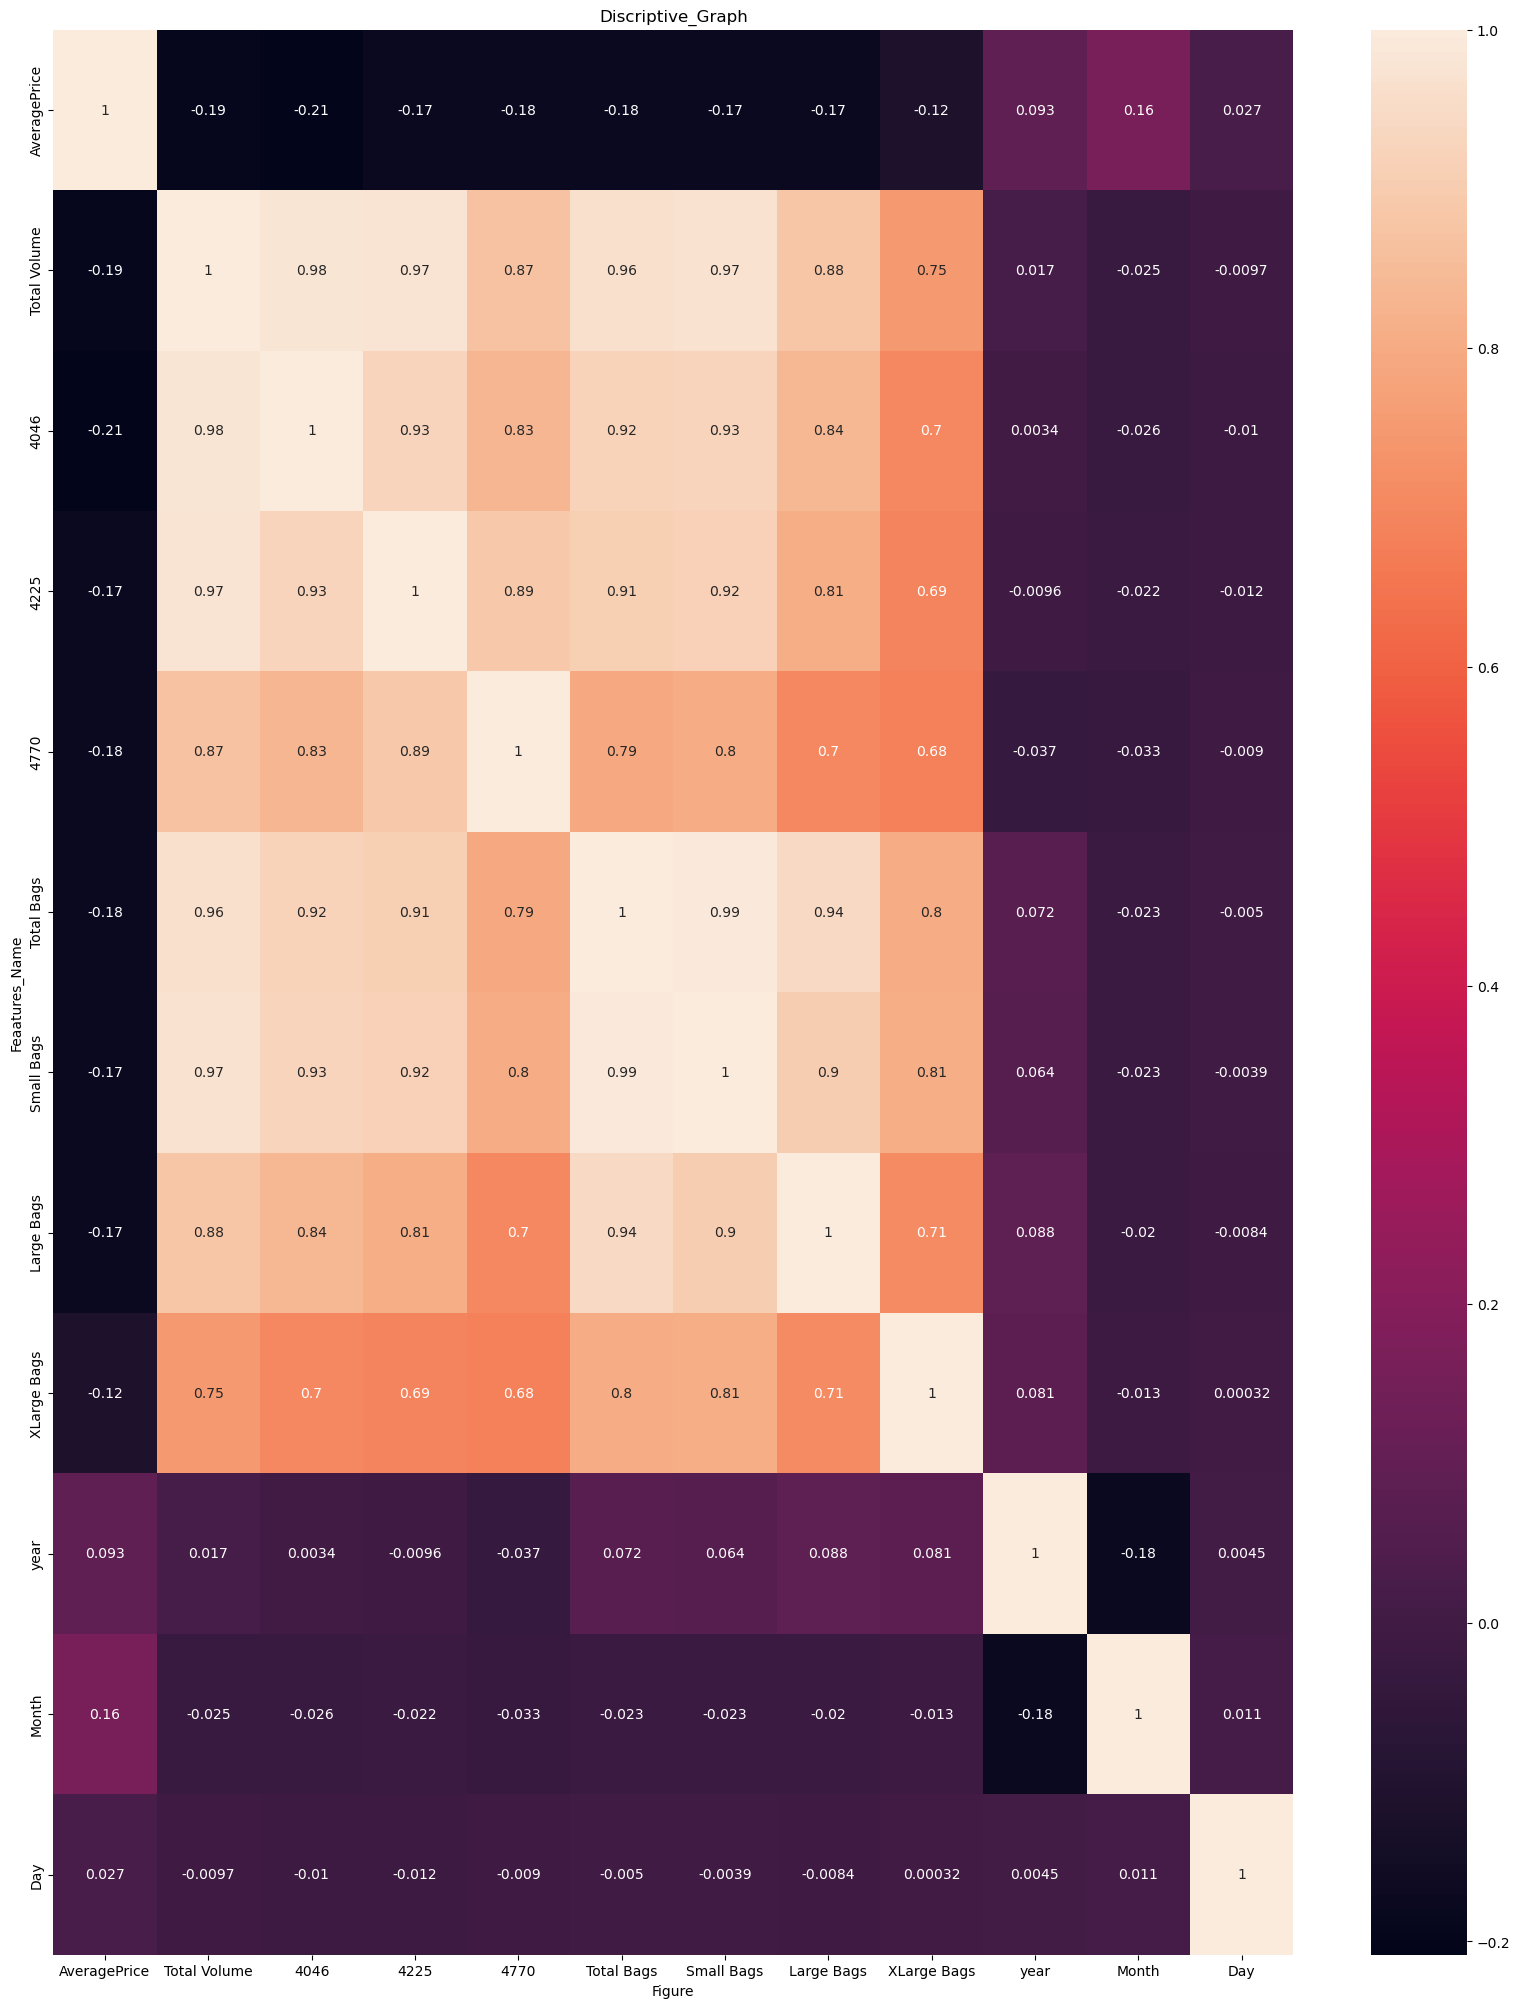

In [28]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.xlabel('Figure')
plt.ylabel('Feaatures_Name')
plt.title('Discriptive_Graph')
plt.show()

give corelation between features

In [29]:
x=df.drop(columns=['AveragePrice'])
y=df['AveragePrice']

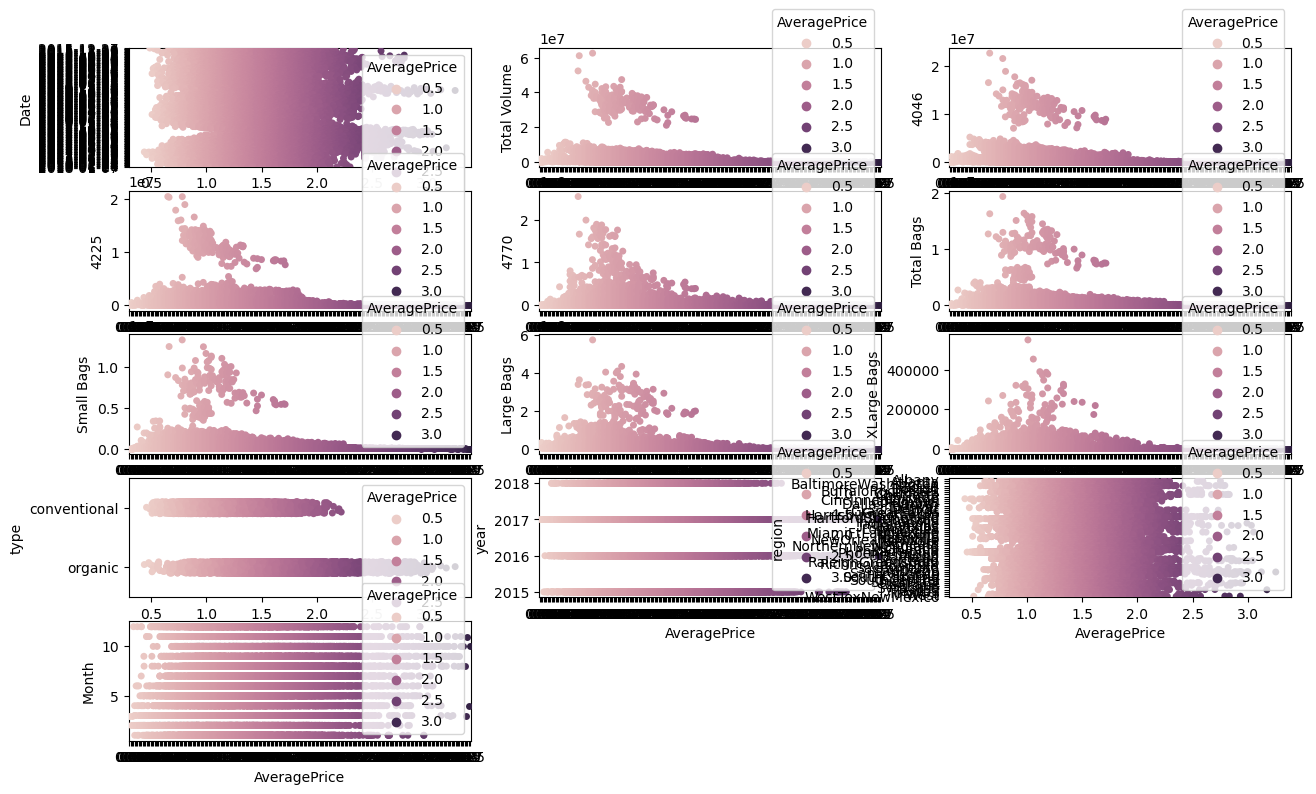

In [33]:
plt.figure(figsize=(15,9))
plotnumber=1
for column in x:
    if plotnumber<=13 :
        ax=plt.subplot(5,3,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
        
    plotnumber+=1
plt.show()

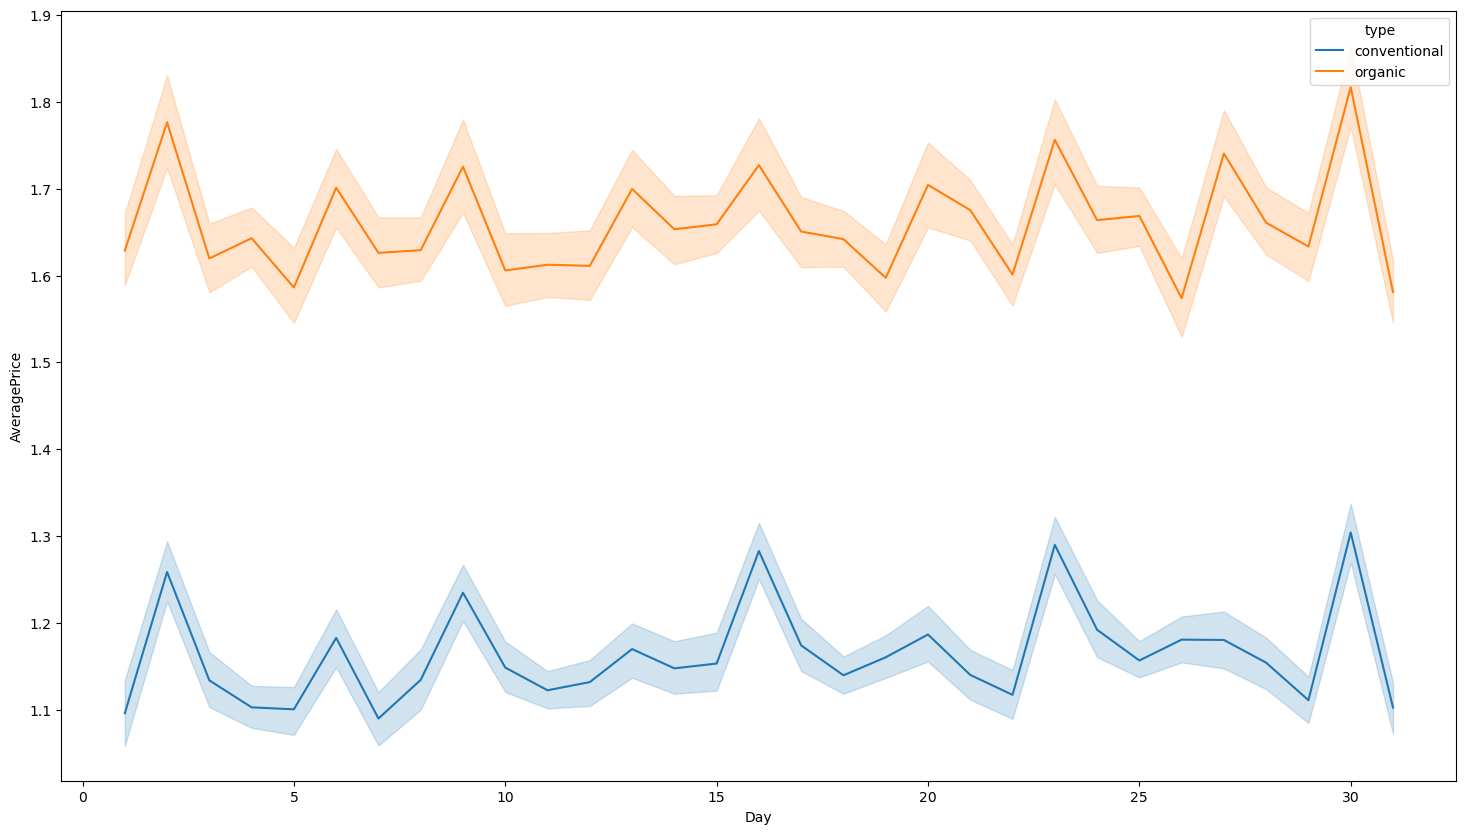

In [34]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Day", y="AveragePrice", hue='type', data=df)
plt.show()

<Figure size 1800x1000 with 0 Axes>

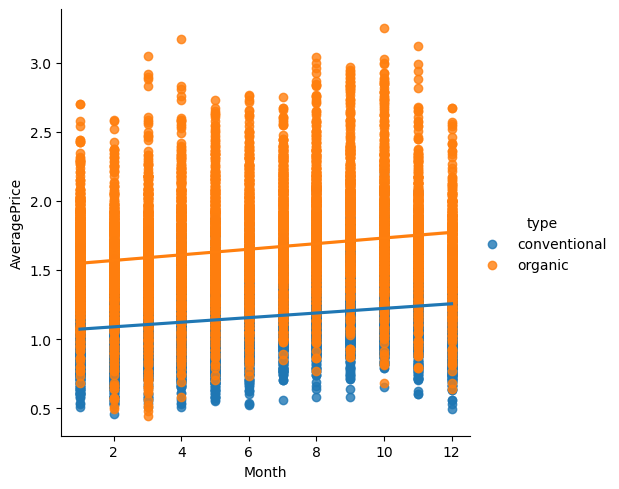

In [35]:
plt.figure(figsize=(18,10))
sns.lmplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [36]:
df1=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [37]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix,mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [40]:
X=df1.drop(columns=['AveragePrice'])
y=df1['AveragePrice']

In [41]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [42]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=r2_score(y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is-",maxAccu,"at randomstate is -",maxRS)

Best r2_score is- 0.4760941798167906 at randomstate is - 113


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=maxRS)

In [44]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (12774, 12)
Size of y_train :  (12774,)
Size of X_test :  (5475, 12)
Size of Y_test :  (5475,)


In [45]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [46]:
pred_LR=LR.predict(X_test)
pred_train=LR.predict(X_train)
print('R2_score',r2_score(y_test,pred_LR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score 0.4662239345673509
R2_score on training data 42.65843836913359
Mean absolute Error 0.2282138976994848
Mean Squared Error 0.08723776690748541
Root Mean Squared Error 0.2953604017255621


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2_score',r2_score(y_test,pred_RFR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.8723682966031386
R2_score on training data 98.03128313328754
Mean absolute Error 0.1005839634703196
Mean Squared Error 0.02085950553424657
Root Mean Squared Error 0.14442820200447892


In [49]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score 0.6550322184866175
R2_score on training data 77.09981946136327
Mean absolute Error 0.16691251141552513
Mean Squared Error 0.056379858264840176
Root Mean Squared Error 0.2374444319516467


In [50]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score',r2_score(y_test,pred_GBR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.7333021980623333
R2_score on training data 73.65002835066169
Mean absolute Error 0.1576345572876837
Mean Squared Error 0.043587793059470845
Root Mean Squared Error 0.20877689781072725


In [51]:
lasso=Lasso()
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2_score',r2_score(y_test,pred_lasso))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score 0.046208027141729224
R2_score on training data 5.246519098228697
Mean absolute Error 0.3181680539166059
Mean Squared Error 0.15588312626756276
Root Mean Squared Error 0.3948203721536704


In [52]:
rd=Ridge()
rd.fit(X_train, y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print('R2_score',r2_score(y_test,pred_rd))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score 0.4662092642109177
R2_score on training data 42.65843456905088
Mean absolute Error 0.22821582998951162
Mean Squared Error 0.08724016455926835
Root Mean Squared Error 0.29536446055554544


In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score 0.7291484181591941
R2_score on training data 100.0
Mean absolute Error 0.13544474885844748
Mean Squared Error 0.04426666666666666
Root Mean Squared Error 0.21039645117412667


In [54]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score 0.3768143917729835
R2_score on training data 34.85058913819687
Mean absolute Error 0.24263688425354182
Mean Squared Error 0.10185042820633498
Root Mean Squared Error 0.3191401388204483


In [55]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2_score',r2_score(y_test,pred_etr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score 0.8948012281902873
R2_score on training data 100.0
Mean absolute Error 0.09039132420091323
Mean Squared Error 0.01719317618082191
Root Mean Squared Error 0.13112275233849352


In [57]:
score=cross_val_score(LR,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_LR)-score.mean())*100)

[-2.25411322e-01  2.09997560e-01  3.38425033e-01 -1.38537013e-02
 -5.44695467e+01]
-10.832077828196576
Differences between R2score and cv score 1129.8301762763926


In [58]:
score=cross_val_score(RFR,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_RFR)-score.mean())*100)

[-0.28427094  0.45644608  0.60833789  0.30756711 -0.05253961]
0.20710810678613317
Differences between R2score and cv score 66.52601898170055


In [60]:
score=cross_val_score(knn,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_knn)-score.mean())*100)

[-1.14263792  0.18386542  0.33865368 -0.09226466 -0.30138089]
-0.20275287441125514
Differences between R2score and cv score 85.77850928978727


In [61]:
score=cross_val_score(lasso,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_lasso)-score.mean())*100)

[-3.80506643 -0.71356941 -0.02812002 -0.39922699 -0.73004586]
-1.1352057434222358
Differences between R2score and cv score 118.14137705639651


In [62]:
score=cross_val_score(rd,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_rd)-score.mean())*100)

[-2.25780326e-01  2.10077315e-01  3.38267538e-01 -1.37484314e-02
 -1.18942132e+02]
-23.72666326946061
Differences between R2score and cv score 2419.2872533671525


In [63]:
score=cross_val_score(dtr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_dtr)-score.mean())*100)

[-0.90317434 -0.01468719  0.22262838 -0.25652868 -0.4552989 ]
-0.2814121443983465
Differences between R2score and cv score 101.05605625575404


In [64]:
score=cross_val_score(svr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[-1.18735866  0.04092546  0.39769018 -0.02831635 -0.29909161]
-0.21523019645856128
Differences between R2score and cv score 59.20445882315448


In [65]:
score=cross_val_score(etr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_etr)-score.mean())*100)

[-0.18033688  0.57728275  0.65923083  0.04082436 -0.02074983]
0.21525024434027684
Differences between R2score and cv score 67.95509838500105


from the difference of both R2score and CV score computed on R2score . We can conclude that SVR as our best fitting and best performing model

In [68]:
param={'kernel':['rbf'],
       'degree':[3],
       'gamma':['scale'],
       'coef0':[0.0], 
       'tol':[0.001], 
       'C':[1.0], 
       'epsilon':[0.1], 
       'shrinking':[True], 
       'cache_size':[200], 
       'verbose':[False], 
       'max_iter':[-1]}

In [70]:
gscv=GridSearchCV(svr,param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0], 'cache_size': [200], 'coef0': [0.0],
                         'degree': [3], 'epsilon': [0.1], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'max_iter': [-1],
                         'shrinking': [True], 'tol': [0.001],
                         'verbose': [False]})

In [71]:
gscv.best_params_

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [72]:
Model=SVR(C= 1.0,
 cache_size= 200,
 coef0=0.0,
 degree= 3,
 epsilon=0.1,
 gamma='scale',
 kernel='rbf',
 max_iter= -1,
 shrinking= True,
 tol= 0.001,
 verbose= False)

In [73]:
Model.fit(X_train, y_train)
pred=Model.predict(X_test)
print('R2_score',r2_score(y_test,pred))
print('Mean absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.3768143917729835
Mean absolute Error 0.24263688425354182
Mean Squared Error 0.10185042820633498
Root Mean Squared Error 0.3191401388204483


# save model¶

In [74]:
import joblib
import pickle
filename='Avacado price Prediction.pkl'
pickle.dump(Model,open(filename,'wb'))

In [75]:
import pickle
loaded_model=pickle.load(open('Avacado price Prediction.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

37.68143917729835


In [76]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],(y_test)[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
predicted,1.568558,1.126042,1.491591,1.56078,1.321708,1.512239,1.574968,1.54346,1.287892,1.239037,...,1.502111,1.572394,1.579447,0.956161,1.269971,1.576101,1.571526,1.57992,0.915812,0.884124
original,1.670000,1.300000,1.420000,1.56000,1.330000,1.580000,1.620000,1.64000,1.140000,1.390000,...,0.980000,1.430000,1.980000,0.990000,1.330000,1.040000,1.190000,1.47000,1.100000,0.890000


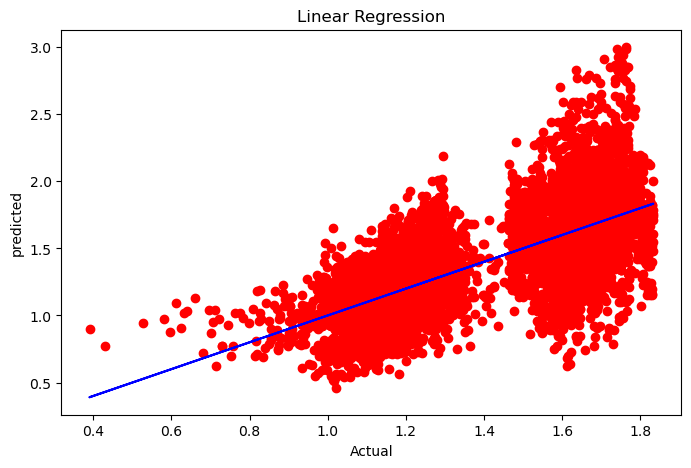

In [77]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Linear Regression')
plt.show()

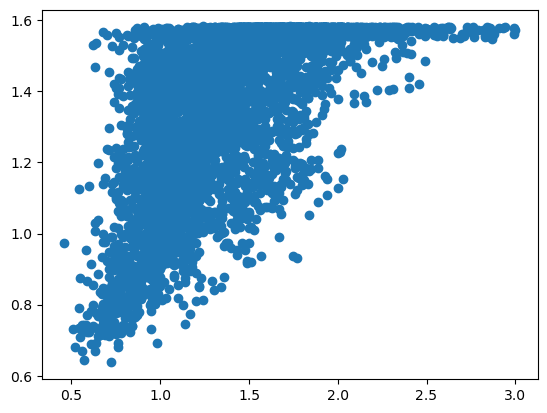

In [78]:
plt.scatter(x=y_test,y=pred)

,Y Test,Pred
9567,1.67,1.568558
7977,1.30,1.126042
4597,1.42,1.491591
9275,1.56,1.560780
6983,1.33,1.321708


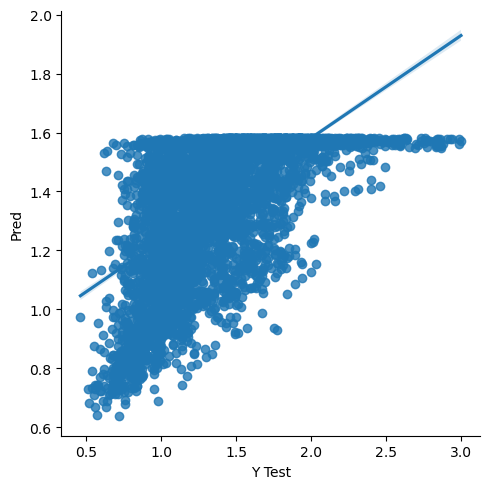

In [80]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()